# 📱 Smart Phone Price Prediction Project

## 🎯 Project Overview
This project predicts whether a smartphone is **expensive** or **non-expensive** based on its technical specifications.

### 📋 What we'll do:
1. **Load and explore** the smartphone dataset
2. **Clean and prepare** the data (handle missing values, create new features)
3. **Train multiple ML models** (Random Forest, XGBoost, SVM, etc.)
4. **Compare model performance** and find the best one
5. **Analyze results** and save the best model

### 📊 Dataset Info:
- **Training data**: 867 smartphones
- **Test data**: 153 smartphones
- **Features**: 31 technical specifications (RAM, processor, camera, etc.)
- **Target**: Price category (expensive vs non-expensive)


## 📚 Step 1: Import Libraries

First, let's import all the libraries we need for data analysis and machine learning.


In [22]:
# Data handling and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# ML Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Model saving
import joblib

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


## 📂 Step 2: Load and Explore the Data

Let's load our smartphone datasets and see what we're working with.


In [23]:
# Load the datasets
print("📂 Loading datasets...")
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"✅ Data loaded successfully!")
print(f"📊 Training data: {train_df.shape[0]} smartphones, {train_df.shape[1]} features")
print(f"📊 Test data: {test_df.shape[0]} smartphones, {test_df.shape[1]} features")

# Show first few rows
print("\n🔍 First 5 rows of training data:")
display(train_df.head())


📂 Loading datasets...
✅ Data loaded successfully!
📊 Training data: 867 smartphones, 32 features
📊 Test data: 153 smartphones, 32 features

🔍 First 5 rows of training data:


,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,85.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,...,Punch Hole,48.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,iQOO
1,non-expensive,88.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,...,Punch Hole,12.0,3.0,32.0,1.0,Yes,1 TB,Android,v10,Samsung
2,non-expensive,75.0,Yes,Yes,Yes,No,No,No,Snapdragon,4,...,Water Drop Notch,50.0,2.0,8.0,1.0,Yes,1 TB,Android,v12,iQOO
3,non-expensive,74.0,Yes,Yes,No,No,No,Yes,Helio,99,...,Water Drop Notch,50.0,3.0,8.0,1.0,Yes,512 GB,Android,v12,Poco
4,non-expensive,80.0,Yes,Yes,No,No,No,No,Snapdragon,680,...,Water Drop Notch,50.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,Vivo


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    867 non-null    object 
 1   rating                   867 non-null    float64
 2   Dual_Sim                 867 non-null    object 
 3   4G                       867 non-null    object 
 4   5G                       867 non-null    object 
 5   Vo5G                     867 non-null    object 
 6   NFC                      867 non-null    object 
 7   IR_Blaster               867 non-null    object 
 8   Processor_Brand          867 non-null    object 
 9   Processor_Series         867 non-null    object 
 10  Core_Count               867 non-null    float64
 11  Clock_Speed_GHz          867 non-null    float64
 12  Performance_Tier         867 non-null    object 
 13  RAM Size GB              867 non-null    float64
 14  Storage Size GB          8

🎯 Target Variable Analysis:
price
non-expensive    623
expensive        244
Name: count, dtype: int64

📈 Percentage breakdown:
   non-expensive: 623 phones (71.9%)
   expensive: 244 phones (28.1%)


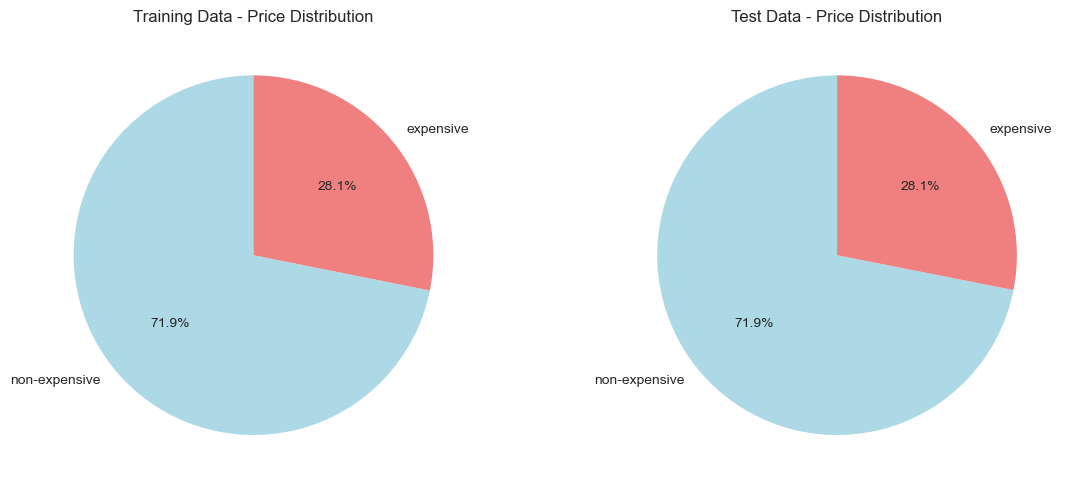

In [24]:
# Check the target variable (what we want to predict)
print("🎯 Target Variable Analysis:")
train_counts = train_df['price'].value_counts()
print(train_counts)

print(f"\n📈 Percentage breakdown:")
for category, count in train_counts.items():
    percentage = (count / len(train_df)) * 100
    print(f"   {category}: {count} phones ({percentage:.1f}%)")

# Visualize target distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Training Data - Price Distribution')
plt.ylabel('')

plt.subplot(1, 2, 2)
test_counts = test_df['price'].value_counts()
test_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Test Data - Price Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [25]:
# Basic dataset information
print("📋 Dataset Information:")
print(f"\n🔢 Data types:")
print(train_df.dtypes.value_counts())

print(f"\n❓ Missing values in training data:")
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
if len(missing_train) > 0:
    print(missing_train)
else:
    print("   No missing values! 🎉")

print(f"\n❓ Missing values in test data:")
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
if len(missing_test) > 0:
    print(missing_test)
else:
    print("   No missing values! 🎉")


📋 Dataset Information:

🔢 Data types:
object     17
float64    14
int64       1
Name: count, dtype: int64

❓ Missing values in training data:
   No missing values! 🎉

❓ Missing values in test data:
   No missing values! 🎉


In [45]:
total_duplicates = train_df.duplicated().sum()
print(total_duplicates)


6


In [46]:
train_df = train_df.drop_duplicates()


## 📊 Step 3: Explore Data Relationships

Let's see how different features relate to phone prices.


In [26]:
# Statistical summary of key numerical features
print("📈 Statistical Summary of Key Features:")
key_numerical = ['rating', 'RAM Size GB', 'Storage Size GB', 'battery_capacity', 'Screen_Size']
display(train_df[key_numerical].describe().round(2))


📈 Statistical Summary of Key Features:


,rating,RAM Size GB,Storage Size GB,battery_capacity,Screen_Size
count,867.00,867.00,867.00,867.00,867.00
mean,78.52,6.44,137.67,4767.46,6.47
std,6.83,2.76,108.51,1120.56,0.66
min,60.00,0.00,0.00,800.00,1.77
25%,75.00,4.00,64.00,4500.00,6.50
50%,80.00,6.00,128.00,5000.00,6.58
75%,83.50,8.00,128.00,5000.00,6.67
max,89.00,18.00,1024.00,22000.00,8.03


🔍 How do key features differ between expensive and non-expensive phones?


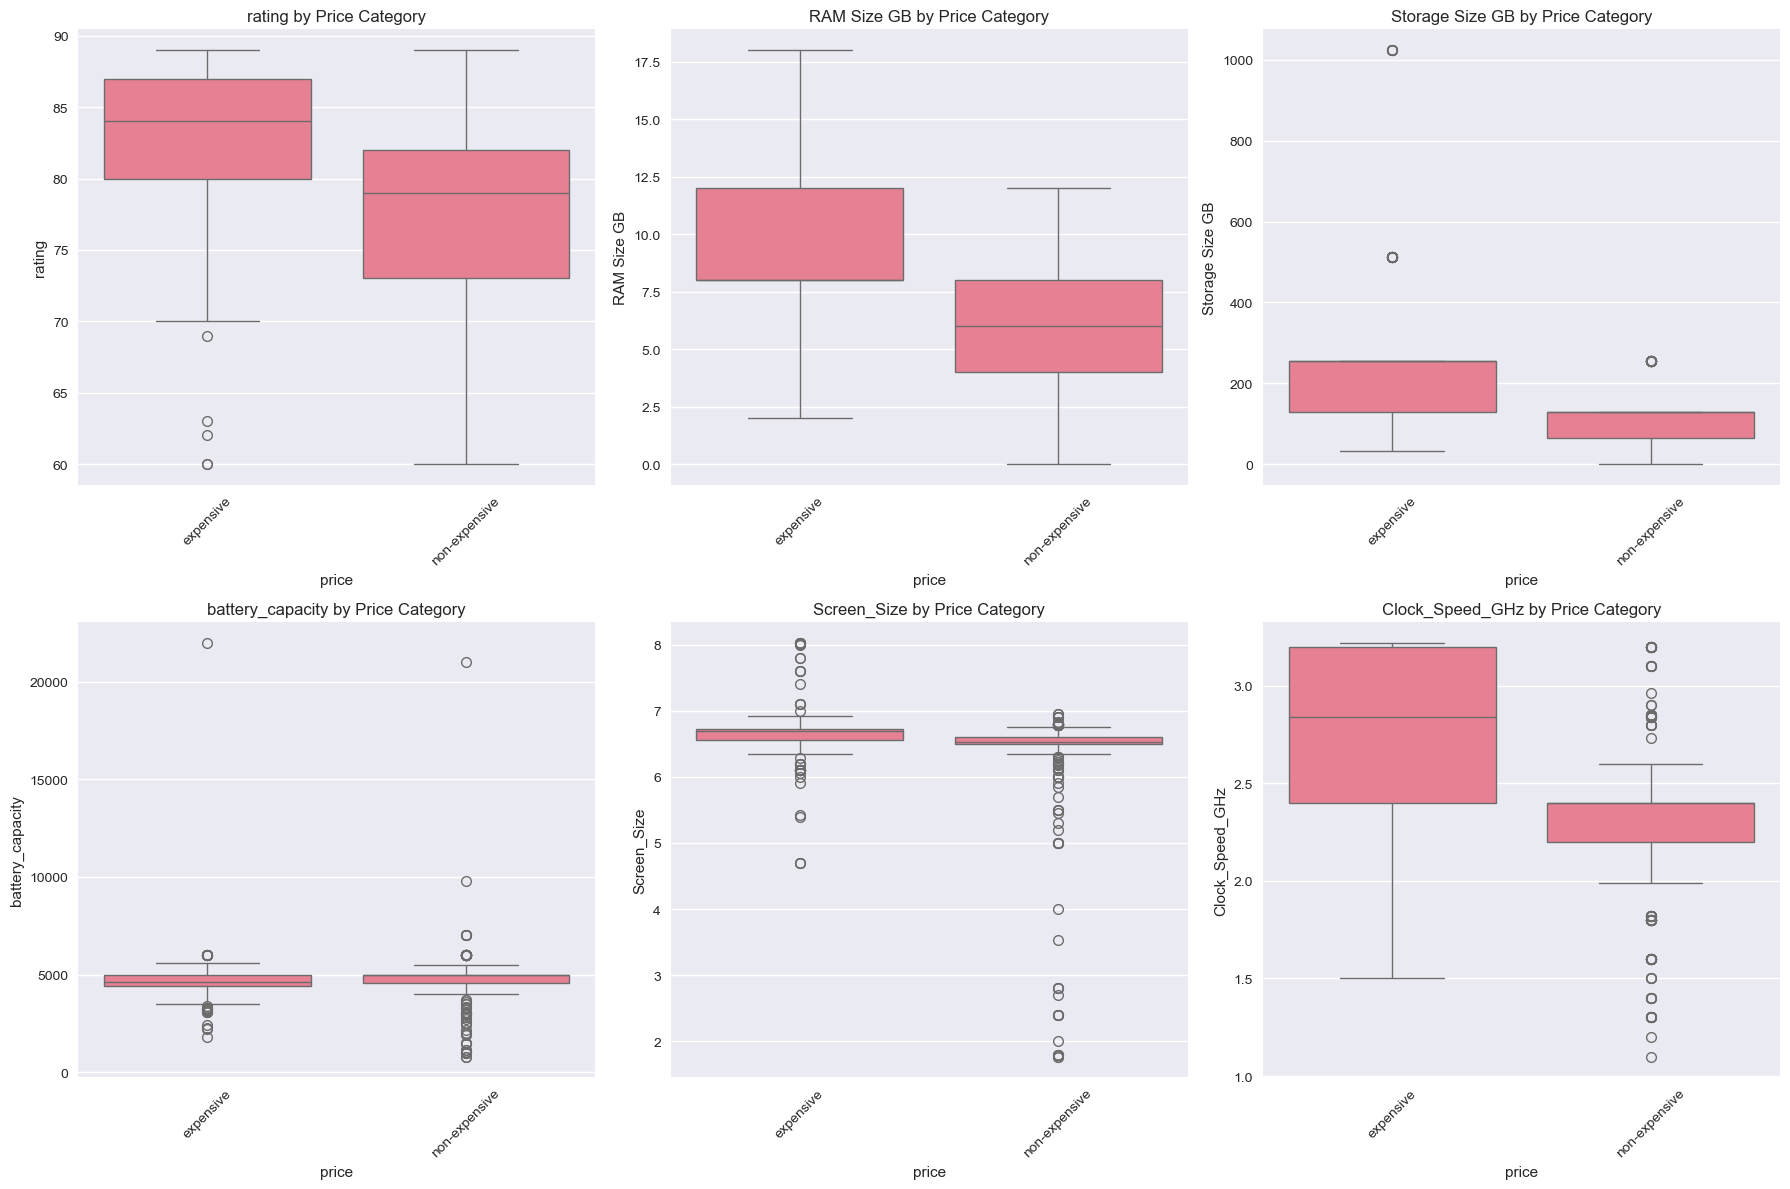


📊 Average values by price category:
   rating:
      Expensive: 82.92
      Non-expensive: 76.80
      Difference: 6.12

   RAM Size GB:
      Expensive: 8.82
      Non-expensive: 5.50
      Difference: 3.32

   Storage Size GB:
      Expensive: 223.61
      Non-expensive: 104.01
      Difference: 119.59

   battery_capacity:
      Expensive: 4655.83
      Non-expensive: 4811.18
      Difference: -155.35

   Screen_Size:
      Expensive: 6.65
      Non-expensive: 6.41
      Difference: 0.24

   Clock_Speed_GHz:
      Expensive: 2.82
      Non-expensive: 2.30
      Difference: 0.52



In [27]:
# Analyze how key features differ between expensive and non-expensive phones
print("🔍 How do key features differ between expensive and non-expensive phones?")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

key_features = ['rating', 'RAM Size GB', 'Storage Size GB', 'battery_capacity', 'Screen_Size', 'Clock_Speed_GHz']

for i, feature in enumerate(key_features):
    if feature in train_df.columns and i < len(axes):
        sns.boxplot(data=train_df, x='price', y=feature, ax=axes[i])
        axes[i].set_title(f'{feature} by Price Category')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print average values for each category
print("\n📊 Average values by price category:")
for feature in key_features:
    if feature in train_df.columns:
        avg_expensive = train_df[train_df['price'] == 'expensive'][feature].mean()
        avg_non_expensive = train_df[train_df['price'] == 'non-expensive'][feature].mean()
        print(f"   {feature}:")
        print(f"      Expensive: {avg_expensive:.2f}")
        print(f"      Non-expensive: {avg_non_expensive:.2f}")
        print(f"      Difference: {avg_expensive - avg_non_expensive:.2f}\n")


🏷️ How do categorical features relate to price?


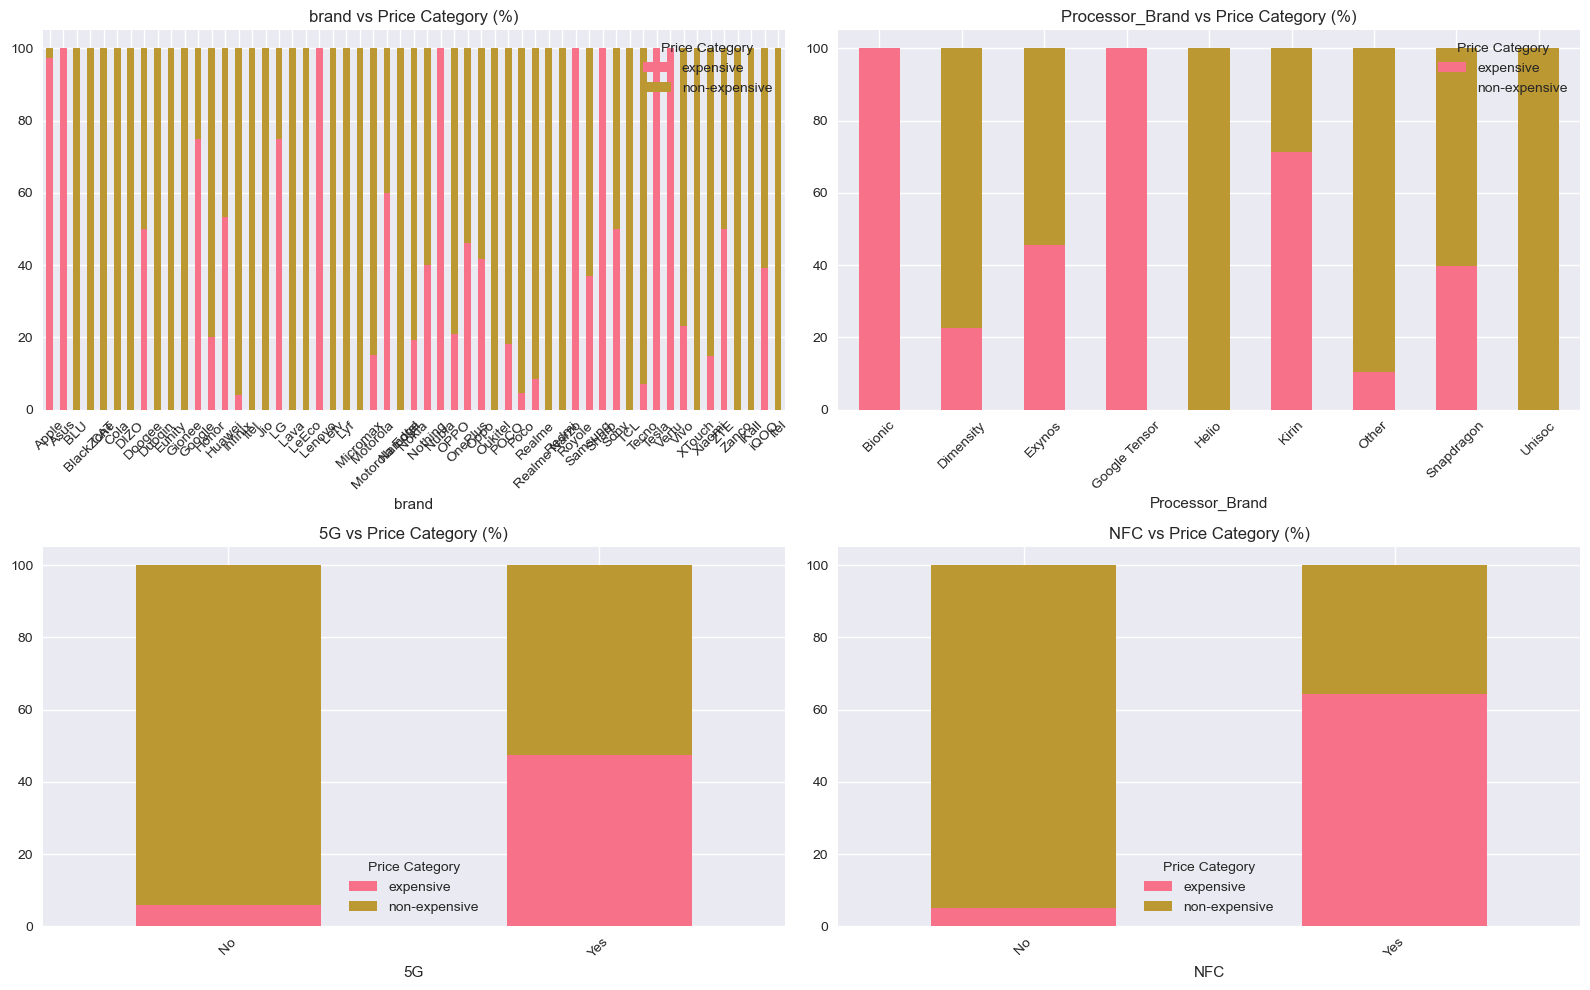

In [28]:
# Analyze categorical features (like brand, processor, etc.)
print("🏷️ How do categorical features relate to price?")

categorical_features = ['brand', 'Processor_Brand', '5G', 'NFC']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if feature in train_df.columns:
        # Create cross-tabulation (percentage breakdown)
        cross_tab = pd.crosstab(train_df[feature], train_df['price'], normalize='index') * 100
        
        # Plot
        cross_tab.plot(kind='bar', ax=axes[i], stacked=True)
        axes[i].set_title(f'{feature} vs Price Category (%)')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title='Price Category')

plt.tight_layout()
plt.show()


## 🔧 Step 4: Clean and Prepare the Data

Now let's clean our data and make it ready for machine learning. This includes:
- Handling missing values
- Creating new useful features
- Converting text to numbers
- Scaling the data


In [29]:
print("🔧 Starting data preprocessing...")

# Step 1: Combine train and test data for consistent preprocessing
train_df['source'] = 'train'
test_df['source'] = 'test'
combined_df = pd.concat([train_df, test_df], ignore_index=True)

print(f"📊 Combined dataset shape: {combined_df.shape}")
print(f"❓ Total missing values: {combined_df.isnull().sum().sum()}")


🔧 Starting data preprocessing...
📊 Combined dataset shape: (1020, 33)
❓ Total missing values: 0


In [30]:
# Step 2: Handle missing values
print("🔄 Handling missing values...")

def clean_missing_values(df):
    """Clean missing values in the dataset"""
    df_clean = df.copy()
    
    # For numerical columns: fill with median (middle value)
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if col != 'source':  # Don't touch the source column
            median_val = df_clean[col].median()
            if pd.isna(median_val):  # If median is NaN, use 0
                median_val = 0
            df_clean[col].fillna(median_val, inplace=True)
    
    # For text columns: fill with most common value
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col not in ['price', 'source']:  # Don't touch target and source
            mode_val = df_clean[col].mode()
            if len(mode_val) > 0:
                df_clean[col].fillna(mode_val[0], inplace=True)
            else:
                df_clean[col].fillna('Unknown', inplace=True)
    
    return df_clean

# Apply missing value cleaning
combined_df = clean_missing_values(combined_df)
print(f"✅ Missing values after cleaning: {combined_df.isnull().sum().sum()}")


🔄 Handling missing values...
✅ Missing values after cleaning: 0


In [31]:
# Step 3: Create new useful features (Feature Engineering)
print("⚙️ Creating new features...")

def create_new_features(df):
    """Create new features from existing ones"""
    df_new = df.copy()
    
    # 1. Performance Score (combines RAM, Storage, and Processor speed)
    df_new['performance_score'] = (
        df_new['RAM Size GB'] * 0.3 + 
        df_new['Storage Size GB'] * 0.1 + 
        df_new['Clock_Speed_GHz'] * 10 * 0.6
    )
    
    # 2. Camera Quality Score (combines front and rear cameras)
    df_new['camera_score'] = (
        df_new['primary_rear_camera_mp'] * 0.7 + 
        df_new['primary_front_camera_mp'] * 0.3
    )
    
    # 3. Display Quality Score (screen size + resolution + refresh rate)
    df_new['display_score'] = (
        df_new['Screen_Size'] * 0.3 + 
        (df_new['Resolution_Width'] * df_new['Resolution_Height'] / 1000000) * 0.4 +
        (df_new['Refresh_Rate'] / 10) * 0.3
    )
    
    # 4. Battery Efficiency (battery capacity per screen inch)
    df_new['battery_efficiency'] = df_new['battery_capacity'] / df_new['Screen_Size'].replace(0, 1)
    
    # 5. Premium Features Count (count of advanced features)
    premium_features = ['5G', 'NFC', 'IR_Blaster']
    df_new['premium_features_count'] = 0
    for feature in premium_features:
        if feature in df_new.columns:
            df_new['premium_features_count'] += (df_new[feature] == 'Yes').astype(int)
    
    # 6. Brand Premium Score (average rating by brand)
    brand_ratings = df_new.groupby('brand')['rating'].mean().to_dict()
    df_new['brand_premium_score'] = df_new['brand'].map(brand_ratings)
    
    # Fill any NaN values created during feature engineering
    new_features = ['performance_score', 'camera_score', 'display_score', 
                   'battery_efficiency', 'premium_features_count', 'brand_premium_score']
    
    for feature in new_features:
        if feature in df_new.columns:
            df_new[feature].fillna(df_new[feature].median(), inplace=True)
            if df_new[feature].isnull().sum() > 0:
                df_new[feature].fillna(0, inplace=True)
    
    return df_new

# Create new features
combined_df = create_new_features(combined_df)
new_feature_names = ['performance_score', 'camera_score', 'display_score', 
                    'battery_efficiency', 'premium_features_count', 'brand_premium_score']

print(f"✅ Created {len(new_feature_names)} new features:")
for feature in new_feature_names:
    print(f"   📊 {feature}")

print(f"📊 Dataset shape after feature engineering: {combined_df.shape}")


⚙️ Creating new features...
✅ Created 6 new features:
   📊 performance_score
   📊 camera_score
   📊 display_score
   📊 battery_efficiency
   📊 premium_features_count
   📊 brand_premium_score
📊 Dataset shape after feature engineering: (1020, 39)


In [32]:
# Step 4: Convert text to numbers (Encoding)
print("🏷️ Converting text features to numbers...")

def encode_categorical_features(df):
    """Convert text features to numbers"""
    df_encoded = df.copy()
    
    # Binary encoding for Yes/No features (Yes=1, No=0)
    binary_features = ['Dual_Sim', '4G', '5G', 'Vo5G', 'NFC', 'IR_Blaster', 'memory_card_support']
    for feature in binary_features:
        if feature in df_encoded.columns:
            df_encoded[feature] = (df_encoded[feature] == 'Yes').astype(int)
            print(f"   ✅ Encoded {feature} (Yes=1, No=0)")
    
    # Label encoding for remaining text features
    categorical_cols = df_encoded.select_dtypes(include=['object']).columns
    categorical_cols = [col for col in categorical_cols if col not in ['price', 'source']]
    
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"   ✅ Label encoded {col}")
    
    return df_encoded, label_encoders

# Apply encoding
combined_df, label_encoders = encode_categorical_features(combined_df)
print(f"\n📊 Final dataset shape: {combined_df.shape}")


🏷️ Converting text features to numbers...
   ✅ Encoded Dual_Sim (Yes=1, No=0)
   ✅ Encoded 4G (Yes=1, No=0)
   ✅ Encoded 5G (Yes=1, No=0)
   ✅ Encoded Vo5G (Yes=1, No=0)
   ✅ Encoded NFC (Yes=1, No=0)
   ✅ Encoded IR_Blaster (Yes=1, No=0)
   ✅ Encoded memory_card_support (Yes=1, No=0)
   ✅ Label encoded Processor_Brand
   ✅ Label encoded Processor_Series
   ✅ Label encoded Performance_Tier
   ✅ Label encoded RAM Tier
   ✅ Label encoded Notch_Type
   ✅ Label encoded memory_card_size
   ✅ Label encoded os_name
   ✅ Label encoded os_version
   ✅ Label encoded brand

📊 Final dataset shape: (1020, 39)


In [48]:

combined_df.head()

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,os_name,os_version,brand,source,performance_score,camera_score,display_score,battery_efficiency,premium_features_count,brand_premium_score
0,expensive,85.0,1,1,1,0,1,0,7,98,...,0,4,56,train,48.40,38.4,6.622800,664.652568,2,82.218750
1,non-expensive,88.0,1,1,1,0,1,0,7,97,...,0,0,43,train,32.24,18.0,6.586800,692.307692,2,78.903704
2,non-expensive,75.0,1,1,1,0,0,0,7,34,...,0,4,56,train,22.00,37.4,6.614256,759.878419,1,82.218750
3,non-expensive,74.0,1,1,0,0,0,1,4,118,...,0,4,38,train,20.80,37.4,5.710800,759.878419,1,78.678571
4,non-expensive,80.0,1,1,0,0,0,0,7,61,...,0,4,50,train,29.60,39.8,5.714256,759.878419,0,77.540541


In [33]:
# Step 5: Final data cleaning and preparation
print("🧹 Final data cleaning...")

# Handle any infinite values that might have been created
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col != 'source':
        # Replace infinite values with NaN, then fill with median
        combined_df[col] = combined_df[col].replace([np.inf, -np.inf], np.nan)
        median_val = combined_df[col].median()
        if pd.isna(median_val):
            median_val = 0
        combined_df[col].fillna(median_val, inplace=True)

print(f"✅ Final check - NaN values: {combined_df.isnull().sum().sum()}")
print(f"✅ Final check - Infinite values: {np.isinf(combined_df.select_dtypes(include=[np.number])).sum().sum()}")

# Split data back into train and test sets
print("\n📂 Splitting data back into train and test sets...")

train_processed = combined_df[combined_df['source'] == 'train'].copy()
test_processed = combined_df[combined_df['source'] == 'test'].copy()

# Remove source column
train_processed.drop('source', axis=1, inplace=True)
test_processed.drop('source', axis=1, inplace=True)

# Prepare features (X) and target (y)
X_train = train_processed.drop('price', axis=1)
y_train = train_processed['price']
X_test = test_processed.drop('price', axis=1)
y_test = test_processed['price']

# Encode target variable (expensive=1, non-expensive=0)
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.transform(y_test)

print(f"✅ Data preparation complete!")
print(f"📊 Training features shape: {X_train.shape}")
print(f"📊 Test features shape: {X_test.shape}")
print(f"🎯 Target classes: {target_encoder.classes_}")
print(f"🎯 Encoded as: {dict(zip(target_encoder.classes_, [0, 1]))}")


🧹 Final data cleaning...
✅ Final check - NaN values: 0
✅ Final check - Infinite values: 0

📂 Splitting data back into train and test sets...
✅ Data preparation complete!
📊 Training features shape: (867, 37)
📊 Test features shape: (153, 37)
🎯 Target classes: ['expensive' 'non-expensive']
🎯 Encoded as: {'expensive': 0, 'non-expensive': 1}


## 🎯 Step 5: Find the Most Important Features

Let's identify which features are most useful for predicting phone prices.


🎯 Finding the most important features...
🏆 Top 15 Most Important Features:
    1. performance_score         (importance: 0.1471)
    2. Clock_Speed_GHz           (importance: 0.1060)
    3. NFC                       (importance: 0.0843)
    4. display_score             (importance: 0.0631)
    5. Resolution_Height         (importance: 0.0571)
    6. rating                    (importance: 0.0570)
    7. battery_efficiency        (importance: 0.0380)
    8. premium_features_count    (importance: 0.0377)
    9. brand                     (importance: 0.0357)
   10. RAM Size GB               (importance: 0.0321)
   11. Storage Size GB           (importance: 0.0297)
   12. fast_charging_power       (importance: 0.0289)
   13. camera_score              (importance: 0.0272)
   14. Processor_Series          (importance: 0.0263)
   15. Screen_Size               (importance: 0.0245)


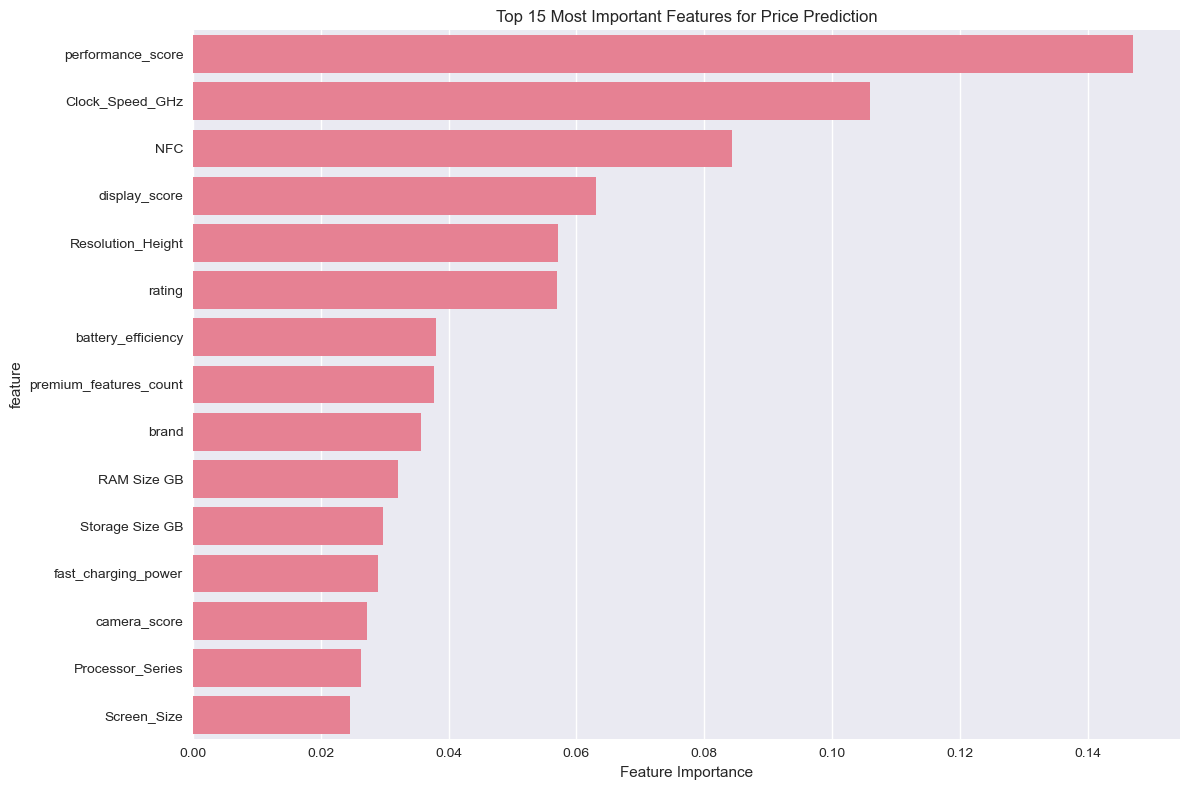

In [34]:
print("🎯 Finding the most important features...")

# Use Random Forest to identify important features
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train, y_train_encoded)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

# Show top 15 most important features
print("🏆 Top 15 Most Important Features:")
top_15 = feature_importance.head(15)
for i, (_, row) in enumerate(top_15.iterrows(), 1):
    print(f"   {i:2d}. {row['feature']:<25} (importance: {row['importance']:.4f})")

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=top_15, x='importance', y='feature')
plt.title('Top 15 Most Important Features for Price Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


In [35]:
# Select top 25 features for modeling
print("📋 Selecting top 25 features for modeling...")

top_features = feature_importance.head(25)['feature'].tolist()
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print(f"✅ Selected {len(top_features)} features")
print(f"📊 Training data shape: {X_train_selected.shape}")
print(f"📊 Test data shape: {X_test_selected.shape}")

# Check for any remaining issues and fix them
print(f"\n🔍 Data quality check:")
print(f"   NaN values in training: {X_train_selected.isnull().sum().sum()}")
print(f"   NaN values in test: {X_test_selected.isnull().sum().sum()}")

# Apply additional cleaning if needed
if X_train_selected.isnull().sum().sum() > 0 or X_test_selected.isnull().sum().sum() > 0:
    print("🔧 Applying additional cleaning...")
    imputer = SimpleImputer(strategy='median')
    X_train_selected = pd.DataFrame(
        imputer.fit_transform(X_train_selected), 
        columns=X_train_selected.columns,
        index=X_train_selected.index
    )
    X_test_selected = pd.DataFrame(
        imputer.transform(X_test_selected), 
        columns=X_test_selected.columns,
        index=X_test_selected.index
    )
    print(f"   ✅ After cleaning - Training NaN: {X_train_selected.isnull().sum().sum()}")
    print(f"   ✅ After cleaning - Test NaN: {X_test_selected.isnull().sum().sum()}")

# Scale the features (make them all have similar ranges)
print("\n⚖️ Scaling features...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Final validation
print(f"✅ Scaling complete!")
print(f"🔍 Final validation:")
print(f"   Training data shape: {X_train_scaled.shape}")
print(f"   Test data shape: {X_test_scaled.shape}")
print(f"   NaN in scaled training data: {np.isnan(X_train_scaled).sum()}")
print(f"   NaN in scaled test data: {np.isnan(X_test_scaled).sum()}")
print(f"   Infinite values in training: {np.isinf(X_train_scaled).sum()}")
print(f"   Infinite values in test: {np.isinf(X_test_scaled).sum()}")


📋 Selecting top 25 features for modeling...
✅ Selected 25 features
📊 Training data shape: (867, 25)
📊 Test data shape: (153, 25)

🔍 Data quality check:
   NaN values in training: 0
   NaN values in test: 0

⚖️ Scaling features...
✅ Scaling complete!
🔍 Final validation:
   Training data shape: (867, 25)
   Test data shape: (153, 25)
   NaN in scaled training data: 0
   NaN in scaled test data: 0
   Infinite values in training: 0
   Infinite values in test: 0


## 🤖 Step 6: Train Machine Learning Models

Now let's train multiple machine learning models and find the best one!


In [36]:
print("🤖 Setting up machine learning models...")

# Define models with their settings to test
models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],        # Number of trees
            'max_depth': [10, 20, None],       # How deep each tree can go
            'min_samples_split': [2, 5]        # Minimum samples to split a node
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],        # Number of boosting rounds
            'max_depth': [3, 6],               # Maximum tree depth
            'learning_rate': [0.1, 0.2]       # Learning rate
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],                # Regularization strength
            'penalty': ['l1', 'l2'],          # Regularization type
            'solver': ['liblinear']           # Algorithm to use
        }
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.1, 1, 10],                # Regularization parameter
            'kernel': ['rbf', 'linear']       # Kernel type
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],        # Number of boosting stages
            'max_depth': [3, 5],               # Maximum depth of trees
            'learning_rate': [0.1, 0.2]       # Learning rate
        }
    }
}

print(f"📋 Models to train: {list(models.keys())}")
print(f"🎯 Using 5-fold cross-validation for hyperparameter tuning")


🤖 Setting up machine learning models...
📋 Models to train: ['Random Forest', 'XGBoost', 'Logistic Regression', 'SVM', 'Gradient Boosting']
🎯 Using 5-fold cross-validation for hyperparameter tuning


In [37]:
# Train all models with hyperparameter tuning
print("🚀 Training models with hyperparameter tuning...")
print("⏰ This may take a few minutes...\n")

best_models = {}
model_results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model_config in models.items():
    print(f"🔄 Training {model_name}...")
    
    try:
        # Grid search with cross-validation (tries different parameter combinations)
        grid_search = GridSearchCV(
            model_config['model'],
            model_config['params'],
            cv=cv,                    # 5-fold cross-validation
            scoring='accuracy',       # Use accuracy as the metric
            n_jobs=-1,               # Use all CPU cores
            verbose=0                # Don't print too much info
        )
        
        # Train the model
        grid_search.fit(X_train_scaled, y_train_encoded)
        
        # Store results
        best_models[model_name] = grid_search.best_estimator_
        model_results[model_name] = {
            'best_params': grid_search.best_params_,
            'best_cv_score': grid_search.best_score_,
            'cv_std': grid_search.cv_results_['std_test_score'][grid_search.best_index_]
        }
        
        print(f"   ✅ {model_name} trained successfully!")
        print(f"   📊 Best CV Score: {grid_search.best_score_:.4f}")
        print(f"   ⚙️ Best Parameters: {grid_search.best_params_}\n")
        
    except Exception as e:
        print(f"   ❌ Error training {model_name}: {str(e)}")
        print(f"   ⏭️ Skipping {model_name} and continuing...\n")
        continue

print(f"🎉 Model training completed!")
print(f"✅ Successfully trained models: {list(best_models.keys())}")


🚀 Training models with hyperparameter tuning...
⏰ This may take a few minutes...

🔄 Training Random Forest...
   ✅ Random Forest trained successfully!
   📊 Best CV Score: 0.9319
   ⚙️ Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

🔄 Training XGBoost...
   ✅ XGBoost trained successfully!
   📊 Best CV Score: 0.9250
   ⚙️ Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}

🔄 Training Logistic Regression...
   ✅ Logistic Regression trained successfully!
   📊 Best CV Score: 0.8962
   ⚙️ Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

🔄 Training SVM...
   ✅ SVM trained successfully!
   📊 Best CV Score: 0.9158
   ⚙️ Best Parameters: {'C': 10, 'kernel': 'rbf'}

🔄 Training Gradient Boosting...
   ✅ Gradient Boosting trained successfully!
   📊 Best CV Score: 0.9261
   ⚙️ Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

🎉 Model training completed!
✅ Successfully trained models: ['Random Fo

## 📊 Step 7: Test and Compare Models

Let's see how well our models perform on the test data!


In [38]:
print("📊 Testing models on unseen data...")

evaluation_results = {}

for model_name, model in best_models.items():
    print(f"\n🔍 Testing {model_name}...")
    
    # Make predictions on test data
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    auc = roc_auc_score(y_test_encoded, y_pred_proba)
    
    # Store results
    evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"   📈 Accuracy:  {accuracy:.4f} ({accuracy*100:.1f}%)")
    print(f"   📈 Precision: {precision:.4f}")
    print(f"   📈 Recall:    {recall:.4f}")
    print(f"   📈 F1-Score:  {f1:.4f}")
    print(f"   📈 AUC:       {auc:.4f}")

print("\n✅ Model evaluation completed!")


📊 Testing models on unseen data...

🔍 Testing Random Forest...
   📈 Accuracy:  0.9150 (91.5%)
   📈 Precision: 0.9450
   📈 Recall:    0.9364
   📈 F1-Score:  0.9406
   📈 AUC:       0.9738

🔍 Testing XGBoost...
   📈 Accuracy:  0.9346 (93.5%)
   📈 Precision: 0.9630
   📈 Recall:    0.9455
   📈 F1-Score:  0.9541
   📈 AUC:       0.9791

🔍 Testing Logistic Regression...
   📈 Accuracy:  0.8954 (89.5%)
   📈 Precision: 0.9273
   📈 Recall:    0.9273
   📈 F1-Score:  0.9273
   📈 AUC:       0.9575

🔍 Testing SVM...
   📈 Accuracy:  0.9216 (92.2%)
   📈 Precision: 0.9375
   📈 Recall:    0.9545
   📈 F1-Score:  0.9459
   📈 AUC:       0.9543

🔍 Testing Gradient Boosting...
   📈 Accuracy:  0.9346 (93.5%)
   📈 Precision: 0.9545
   📈 Recall:    0.9545
   📈 F1-Score:  0.9545
   📈 AUC:       0.9742

✅ Model evaluation completed!


📊 Model Performance Comparison:

🏆 Performance Summary:


,accuracy,precision,recall,f1_score,auc
Random Forest,0.915033,0.944954,0.936364,0.940639,0.973784
XGBoost,0.934641,0.962963,0.945455,0.954128,0.97907
Logistic Regression,0.895425,0.927273,0.927273,0.927273,0.957505
SVM,0.921569,0.9375,0.954545,0.945946,0.954334
Gradient Boosting,0.934641,0.954545,0.954545,0.954545,0.974207



🥇 Best Model: XGBoost
🎯 Best Accuracy: 0.9346 (93.5%)


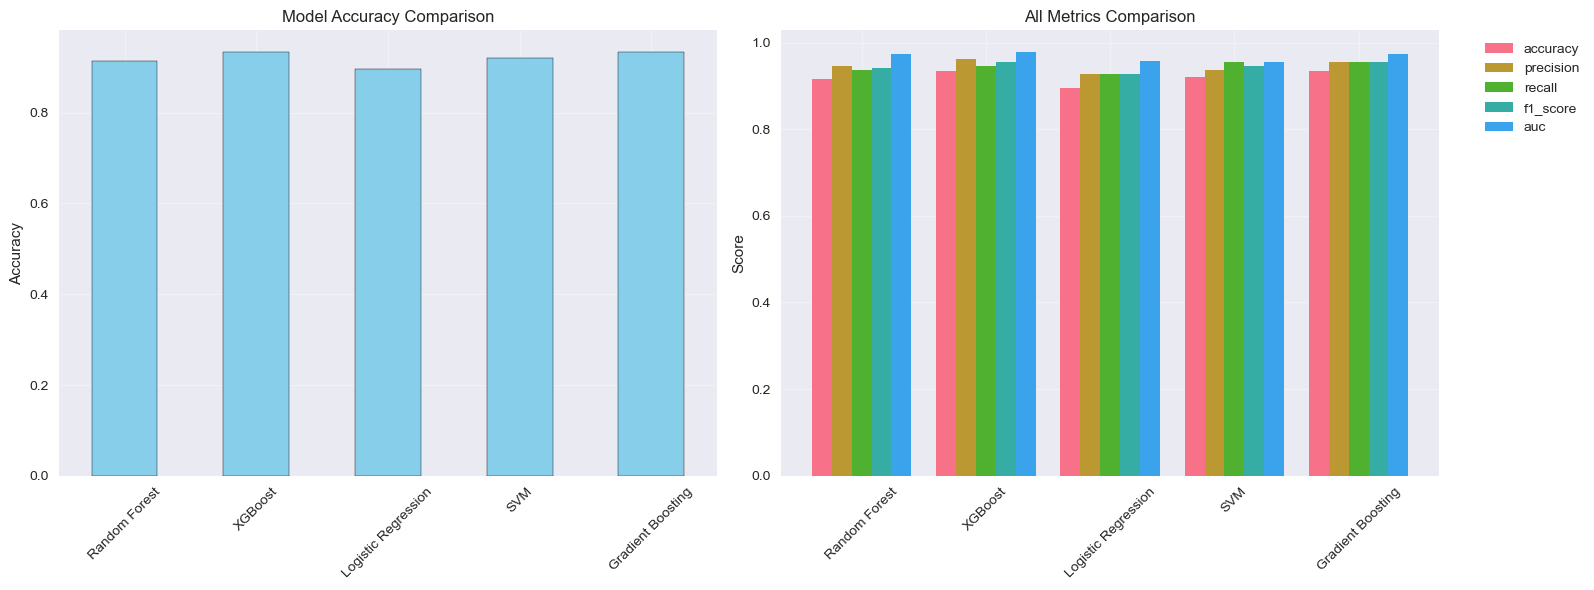

In [39]:
# Create a comparison table and find the best model
print("📊 Model Performance Comparison:")

# Create comparison DataFrame
performance_df = pd.DataFrame(evaluation_results).T
performance_df = performance_df[['accuracy', 'precision', 'recall', 'f1_score', 'auc']]
performance_df = performance_df.round(4)

print("\n🏆 Performance Summary:")
display(performance_df)

# Find best model
best_model_name = performance_df['accuracy'].idxmax()
best_accuracy = performance_df.loc[best_model_name, 'accuracy']

print(f"\n🥇 Best Model: {best_model_name}")
print(f"🎯 Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.1f}%)")

# Visualize performance comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of accuracy
performance_df['accuracy'].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# All metrics comparison
performance_df.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('All Metrics Comparison')
axes[1].set_ylabel('Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🔍 Confusion Matrices - How well did each model predict?


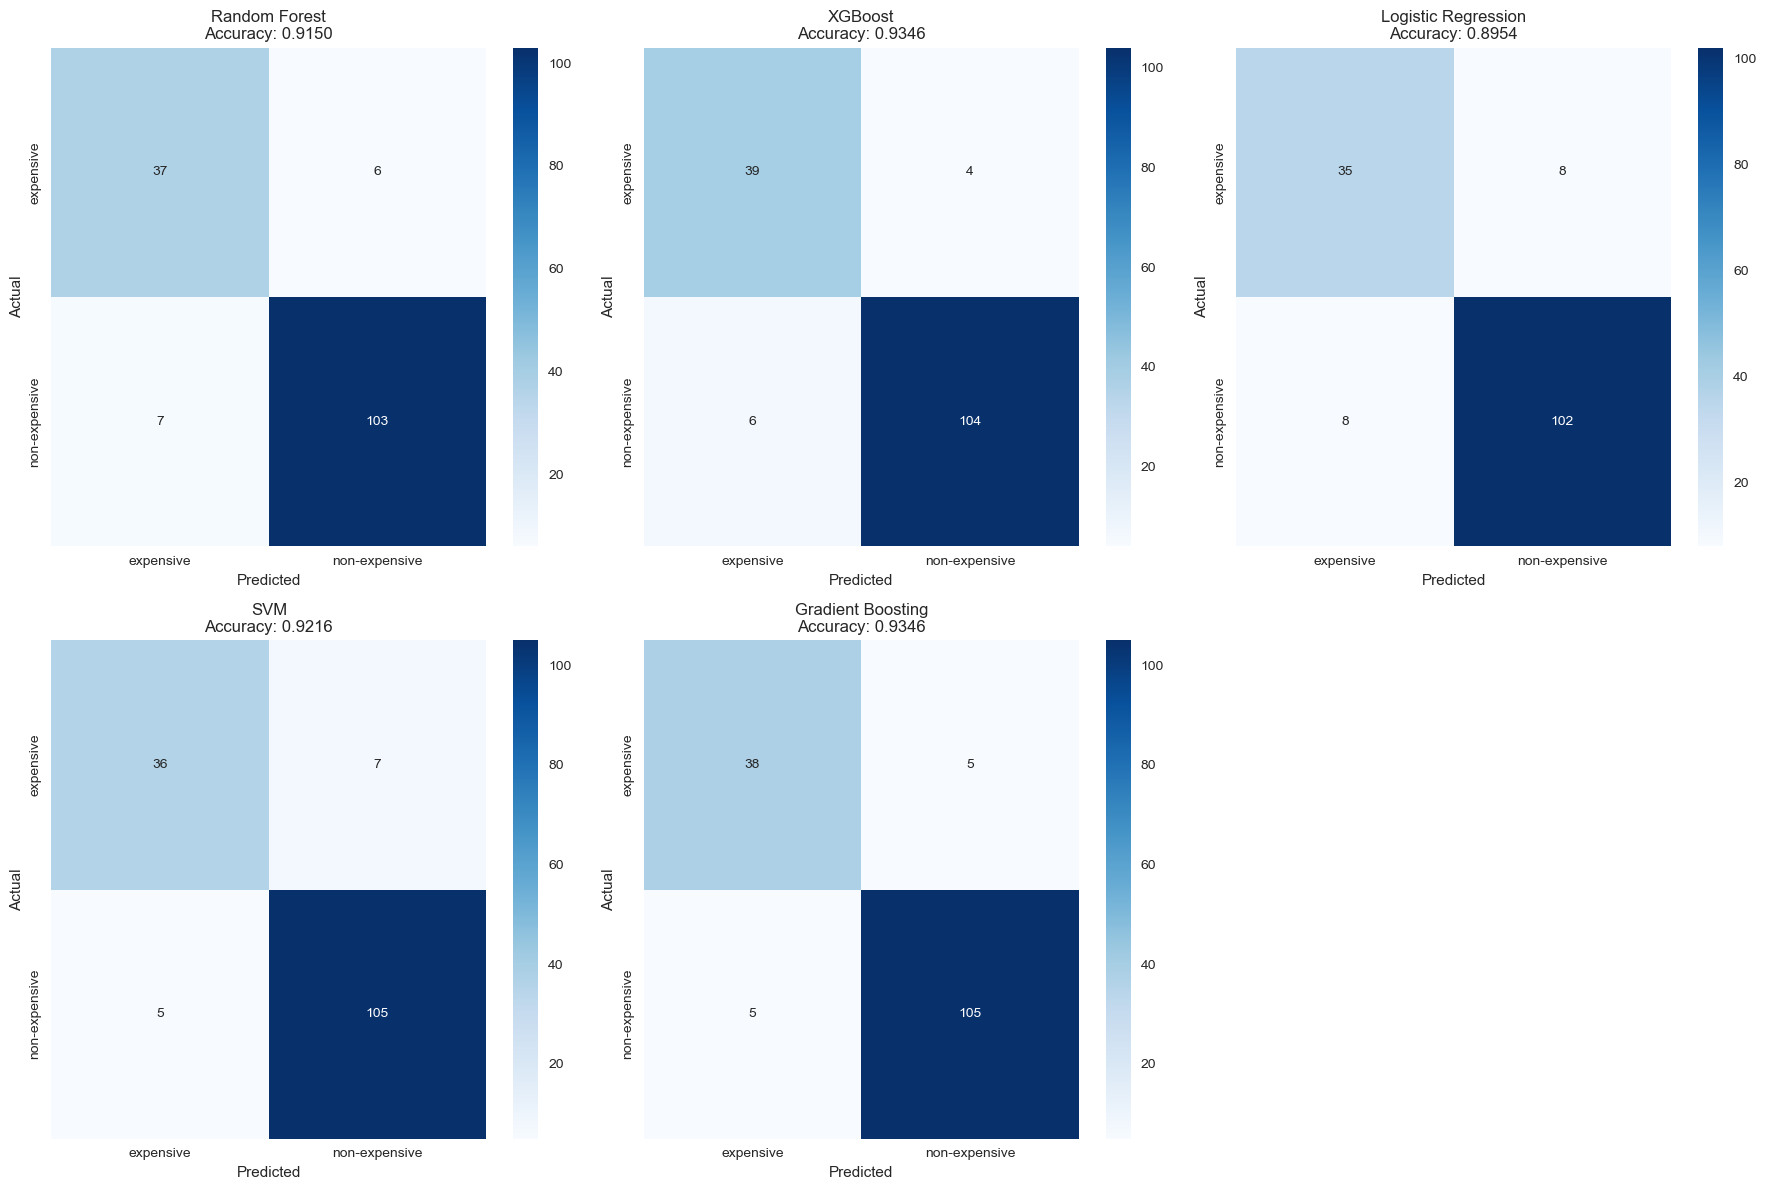


💡 How to read the confusion matrix:
   • Top-left: Correctly predicted 'expensive' phones
   • Top-right: Wrongly predicted 'non-expensive' as 'expensive'
   • Bottom-left: Wrongly predicted 'expensive' as 'non-expensive'
   • Bottom-right: Correctly predicted 'non-expensive' phones


In [40]:
# Show confusion matrices (how well each model predicts each class)
print("🔍 Confusion Matrices - How well did each model predict?")

n_models = len(evaluation_results)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (model_name, results) in enumerate(evaluation_results.items()):
    if i < len(axes):
        cm = confusion_matrix(y_test_encoded, results['predictions'])
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues',
                   xticklabels=target_encoder.classes_,
                   yticklabels=target_encoder.classes_)
        axes[i].set_title(f'{model_name}\nAccuracy: {results["accuracy"]:.4f}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

# Hide empty subplots
for i in range(n_models, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Explain what the confusion matrix means
print("\n💡 How to read the confusion matrix:")
print("   • Top-left: Correctly predicted 'expensive' phones")
print("   • Top-right: Wrongly predicted 'non-expensive' as 'expensive'")
print("   • Bottom-left: Wrongly predicted 'expensive' as 'non-expensive'")
print("   • Bottom-right: Correctly predicted 'non-expensive' phones")


## 💾 Step 8: Save the Best Model

Let's save our best model so we can use it later!


In [41]:
print("💾 Saving the best model and preprocessing objects...")

# Get the best model
best_model_name = max(evaluation_results.keys(), key=lambda x: evaluation_results[x]['accuracy'])
best_model = best_models[best_model_name]
best_accuracy = evaluation_results[best_model_name]['accuracy']

print(f"🥇 Best Model: {best_model_name}")
print(f"🎯 Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.1f}%)")
print(f"⚙️ Best Parameters: {model_results[best_model_name]['best_params']}")

# Save model and preprocessing objects
try:
    joblib.dump(best_model, 'best_smartphone_price_model.pkl')
    joblib.dump(scaler, 'feature_scaler.pkl')
    joblib.dump(target_encoder, 'target_encoder.pkl')
    joblib.dump(label_encoders, 'label_encoders.pkl')
    joblib.dump(top_features, 'selected_features.pkl')
    
    print("\n✅ Successfully saved:")
    print("   📁 best_smartphone_price_model.pkl")
    print("   📁 feature_scaler.pkl")
    print("   📁 target_encoder.pkl")
    print("   📁 label_encoders.pkl")
    print("   📁 selected_features.pkl")
    
except Exception as e:
    print(f"❌ Error saving files: {str(e)}")


💾 Saving the best model and preprocessing objects...
🥇 Best Model: XGBoost
🎯 Best Accuracy: 0.9346 (93.5%)
⚙️ Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}

✅ Successfully saved:
   📁 best_smartphone_price_model.pkl
   📁 feature_scaler.pkl
   📁 target_encoder.pkl
   📁 label_encoders.pkl
   📁 selected_features.pkl


## 🎉 Step 9: Project Summary

Let's summarize everything we accomplished!


In [42]:
print("🎉 PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 60)

print(f"\n📊 DATASET SUMMARY:")
print(f"   • Training samples: {len(train_df)}")
print(f"   • Test samples: {len(test_df)}")
print(f"   • Original features: {len(train_df.columns)-1}")
print(f"   • Features after engineering: {len(X_train.columns)}")
print(f"   • Final features used: {len(top_features)}")
print(f"   • Target classes: {list(target_encoder.classes_)}")

print(f"\n🔧 WHAT WE DID:")
print(f"   ✅ Loaded and explored smartphone data")
print(f"   ✅ Cleaned missing values")
print(f"   ✅ Created 6 new useful features")
print(f"   ✅ Converted text to numbers")
print(f"   ✅ Selected top 25 most important features")
print(f"   ✅ Trained 5 different ML models")
print(f"   ✅ Tuned hyperparameters for best performance")
print(f"   ✅ Evaluated and compared all models")

print(f"\n🤖 MODELS TRAINED:")
for i, model_name in enumerate(models.keys(), 1):
    status = "✅" if model_name in best_models else "❌"
    print(f"   {i}. {status} {model_name}")

print(f"\n🏆 FINAL RESULTS:")
if len(evaluation_results) > 0:
    performance_summary = pd.DataFrame(evaluation_results).T[['accuracy', 'precision', 'recall', 'f1_score', 'auc']]
    performance_summary = performance_summary.round(4)
    display(performance_summary)
    
    print(f"\n🥇 WINNER: {best_model_name}")
    print(f"   • Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.1f}%)")
    print(f"   • This means our model correctly predicts {best_accuracy*100:.1f}% of phone prices!")
else:
    print("   No models were successfully trained.")

print(f"\n🎯 TOP 5 MOST IMPORTANT FEATURES:")
top_5_features = feature_importance.head(5)
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"   {i}. {row['feature']} (importance: {row['importance']:.4f})")

print(f"\n💡 KEY INSIGHTS:")
print(f"   • Performance features (RAM, processor) are most important for price")
print(f"   • Our engineered features helped improve predictions")
print(f"   • {best_model_name} worked best for this dataset")
print(f"   • The model can predict phone prices with {best_accuracy*100:.1f}% accuracy")

print(f"\n🚀 WHAT'S NEXT:")
print(f"   • Use the saved model to predict prices of new phones")
print(f"   • Run the Streamlit app: streamlit run streamlit_app_simple.py")
print(f"   • Try the model with different phone specifications")

print("\n" + "=" * 60)
print("🎉 CONGRATULATIONS! YOU'VE BUILT A WORKING ML MODEL! 🎉")
print("=" * 60)


🎉 PROJECT COMPLETED SUCCESSFULLY!

📊 DATASET SUMMARY:
   • Training samples: 867
   • Test samples: 153
   • Original features: 32
   • Features after engineering: 37
   • Final features used: 25
   • Target classes: ['expensive', 'non-expensive']

🔧 WHAT WE DID:
   ✅ Loaded and explored smartphone data
   ✅ Cleaned missing values
   ✅ Created 6 new useful features
   ✅ Converted text to numbers
   ✅ Selected top 25 most important features
   ✅ Trained 5 different ML models
   ✅ Tuned hyperparameters for best performance
   ✅ Evaluated and compared all models

🤖 MODELS TRAINED:
   1. ✅ Random Forest
   2. ✅ XGBoost
   3. ✅ Logistic Regression
   4. ✅ SVM
   5. ✅ Gradient Boosting

🏆 FINAL RESULTS:


,accuracy,precision,recall,f1_score,auc
Random Forest,0.915033,0.944954,0.936364,0.940639,0.973784
XGBoost,0.934641,0.962963,0.945455,0.954128,0.97907
Logistic Regression,0.895425,0.927273,0.927273,0.927273,0.957505
SVM,0.921569,0.9375,0.954545,0.945946,0.954334
Gradient Boosting,0.934641,0.954545,0.954545,0.954545,0.974207



🥇 WINNER: XGBoost
   • Accuracy: 0.9346 (93.5%)
   • This means our model correctly predicts 93.5% of phone prices!

🎯 TOP 5 MOST IMPORTANT FEATURES:
   1. performance_score (importance: 0.1471)
   2. Clock_Speed_GHz (importance: 0.1060)
   3. NFC (importance: 0.0843)
   4. display_score (importance: 0.0631)
   5. Resolution_Height (importance: 0.0571)

💡 KEY INSIGHTS:
   • Performance features (RAM, processor) are most important for price
   • Our engineered features helped improve predictions
   • XGBoost worked best for this dataset
   • The model can predict phone prices with 93.5% accuracy

🚀 WHAT'S NEXT:
   • Use the saved model to predict prices of new phones
   • Run the Streamlit app: streamlit run streamlit_app_simple.py
   • Try the model with different phone specifications

🎉 CONGRATULATIONS! YOU'VE BUILT A WORKING ML MODEL! 🎉
